<a href="https://colab.research.google.com/github/TheodorosChristou/COM616_AE2_TheodorosChristou/blob/main/MobileNet_Architecture_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_142 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_83 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d_39 (Depth  (None, 16, 16, 64)        640       
 wiseConv2D)                                                     
                                                                 
 batch_normalization_143 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                     

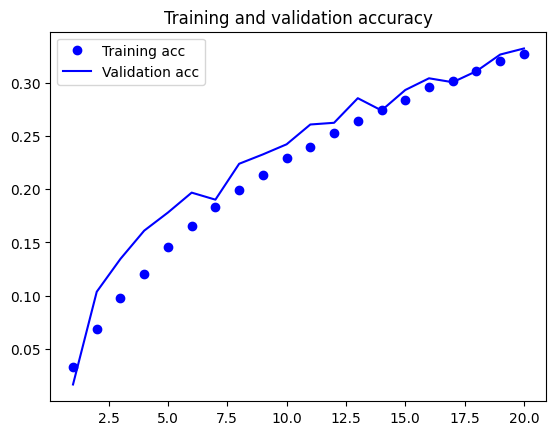

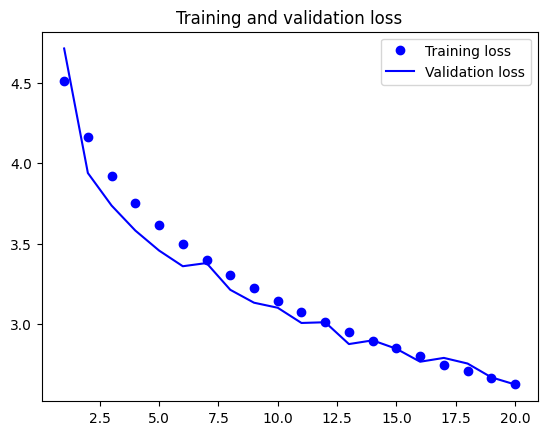

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.67045   0.59000   0.62766       100
          dolphin    0.40625   0.39000   0.39796       100
            otter    0.20611   0.27000   0.23377       100
             seal    0.19512   0.08000   0.11348       100
            whale    0.12037   0.13000   0.12500       100
         aquarium    0.21818   0.36000   0.27170       100
             fish    0.33628   0.38000   0.35681       100
              ray    0.37037   0.30000   0.33149       100
            shark    0.34058   0.47000   0.39496       100
            trout    0.42553   0.40000   0.41237       100
          orchids    0.21429   0.06000   0.09375       100
          poppies    0.29630   0.08000   0.12598       100
            roses    0.34746   0.41000   0.37615       100
       sunflowers    0.30769   0.16000   0.21053       100
           tulips    0.32203   0.19000   0.23899     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D

def MobileNet():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())

    model.add(Dropout(0.4))

    model.add(Dense(100, activation='softmax'))

    return model

MobileNet.summary()

MobileNet = build_simple_mobilenet()

optimizer = Adam(learning_rate=0.0001)
MobileNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = MobileNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet)
        scores = MobileNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {MobileNet.metrics_names[1]} of {scores[1]*100}')
        return MobileNet

MobileNet = gpu()

test_loss, test_acc = MobileNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')